In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
united_df = pd.read_csv('data/united.csv')

In [3]:
united_df.head(2)

,image_link,temperature,description,logits,hallucinations,hedges,probe_1,label_1,pred_1,context_1,...,context_2,probe_3,label_3,pred_3,context_3,probe_4,label_4,pred_4,context_4,group_num
0,https://cdn.pixabay.com/photo/2021/12/18/06/01...,0.8,The image depicts a lively street scene with ...,"[(' The', {'The': 0.9288, 'This': 0.0377, 'In'...",The image depicts a lively street scene with c...,The image depicts a lively street scene with c...,All buildings are painted white.,False,0.769080,The image depicts a lively street scene [with ...,...,The image depicts a lively street scene with c...,There are pedastrians walking.,True,0.715424,The image depicts a lively street scene with c...,There is only cars in the street.,False,0.727975,The image depicts a lively street scene with c...,5
1,https://cdn.pixabay.com/photo/2022/08/01/12/24...,0.8,The image features a bustling city street wit...,"[(' The', {'The': 0.8123, 'In': 0.1575, 'This'...",The image features a bustling city street with...,The image features a bustling city street with...,There is a womam that carried handbag,True,0.550607,The image features a bustling city street with...,...,The image features a bustling city street with...,There are two men each carrying one child on t...,True,0.637031,The image features a bustling city street with...,There are several cars in the scene.,False,0.861538,The image features a bustling city street with...,5


In [4]:
# train (50%) dev (15%) test (35%) split
train_df = united_df.sample(frac=0.5, random_state=0)
dev_df = united_df.drop(train_df.index).sample(frac=0.3, random_state=0)
test_df = united_df.drop(train_df.index).drop(dev_df.index)

In [5]:
train_df['split'] = 'train'
dev_df['split'] = 'dev'
test_df['split'] = 'test'

united_divided_df = pd.concat([train_df, dev_df, test_df])
united_divided_df.to_csv('data/united_divided.csv', index=False)

In [3]:
united_divided_df = pd.read_csv('data/united_divided.csv')

In [4]:
united_divided_df

,image_link,temperature,description,logits,hallucinations,hedges,probe_1,label_1,pred_1,context_1,...,probe_3,label_3,pred_3,context_3,probe_4,label_4,pred_4,context_4,group_num,split
0,https://cdn.pixabay.com/photo/2020/10/03/11/08...,0.8,The image features a woman holding out her ha...,"[(' The', {'The': 0.6002, 'In': 0.3314, 'A': 0...",The image features a woman holding out her han...,The image features a woman holding out her han...,There is handbag.,False,0.527317,The image features a woman holding out her ha...,...,The dog is white.,False,0.507812,The image features a woman holding out her ha...,The dog is far from the woman.,False,0.766294,The image features a woman holding out her ha...,5,train
1,https://cdn.pixabay.com/photo/2021/11/16/11/13...,1.0,"In a camping scene, a man is sitting outside ...","[(' In', {'The': 0.7592, 'In': 0.1642, 'A': 0....","In a camping scene, a man is sitting outside a...","In a camping scene, a man is sitting outside a...",The man is sitting outside a tent.,True,0.705785,"In a camping scene, [a man is sitting outside ...",...,The man is cooking.,False,0.542863,"In a camping scene, a man is sitting outside a...",There are multiple cups on the ground.,False,0.885631,"In a camping scene, a man is sitting outside a...",5,train
2,https://cdn.pixabay.com/photo/2016/10/25/15/14...,0.7,<0x0A>The image captures a cozy and inviting s...,"[('<0x0A>', {'<0x0A>': 0.9769598245620728, ' T...",NaN,<0x0A>The image captures a cozy and inviting s...,there is a frothy glass of milk in the picture,True,0.724870,<0x0A>The image captures a cozy and inviting s...,...,there are chocolatechip cookies beside to the ...,True,0.734120,<0x0A>The image captures a cozy and inviting s...,there are red and green beads on top of the co...,True,0.392337,<0x0A>The image captures a cozy and inviting s...,4,train
3,https://cdn.pixabay.com/photo/2018/04/30/13/34...,0.8,The scene shows young women practicing ballet...,"[(' The', {'The': 0.8844, 'In': 0.0977, 'This'...",The scene shows young women practicing ballet ...,The scene shows young women practicing ballet ...,There is only two women in the scene.,True,0.562176,The scene shows young women practicing ballet ...,...,The scene take a place in a dancing studio.,True,0.629775,[The scene shows young women practicing ballet...,"In the scene, mature women are seen practicing...",False,0.500000,[The scene shows young women practicing ballet...,5,train
4,https://media.istockphoto.com/id/2023254311/ph...,0.7,"<0x0A>In the image, there are two men in a gra...","[('<0x0A>', {'<0x0A>': 0.9428242444992065, ' I...",NaN,"<0x0A>In the image, there are two men in a gra...",there are two men standing in the field,True,0.721743,"<0x0A>In the image, [there are two men in a gr...",...,the drone is black,False,0.692642,"<0x0A>In the image, there are two men in a gra...",one of the men is observing the drone,False,0.819893,"<0x0A>In the image, there are two men in a gra...",4,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,https://avatars.mds.yandex.net/i?id=2ae289e8a1...,0.7,"<0x0A>In the image, there are five individuals...","[('<0x0A>', {'<0x0A>': 0.9760920405387878, ' T...","<0x0A>In the image, there are five individuals...","<0x0A>In the image, there are five individuals...",the second person from the left is a man,False,0.774583,"<0x0A>In the image, there are five individuals...",...,the background is a blurred office setting,True,0.919643,"<0x0A>In the image, there are five individuals...","starting from the left, the first individual i...",True,0.857768,"<0x0A>In the image, there are five individuals...",4,test
346,https://www.westernmutual.com/_content/Sites.A...,0.7,"The image depicts a group of professionals, b...","[(' The', {'<0x0A>': 0.10414168983697891, ' I'...","The image depicts a group of professionals, b...","The image depicts a group of professionals, b...",the woman in the middle is smiling and raising...,False,0.865224,"The im

In [42]:
# count rows that have '[' in hedges
print(united_divided_df[united_divided_df['hedges'].str.contains('\[')].shape[0])

248


In [17]:
import ast

In [20]:
united_divided_df['logits'] = united_divided_df['logits'].apply(ast.literal_eval)

In [30]:
united_divided_df['hallucinations'][0]

# Find the indexes of the brackets
start_index = text.find("[") + 1  # +1 to get the start of the word
end_index = text.find("]")

# Extract the word within brackets
word_in_brackets = text[start_index:end_index]

# Display the indexes and the word
(start_index, end_index - 1, word_in_brackets)

'The image features a woman holding out her hand, waving at a brown dog that is on a leash. The dog is standing close to the woman, seemingly eager to lick her hand. They appear to be spending quality time together outdoors. There is also a [handbag] visible in the scene, situated close to the woman and the dog.'

 In a camping scene, a man is sitting outside a makeshift tent. He is enjoying a cigarette in front of a pit, smoke rising from it. The man also appears to be cooking something, indicating that the image captures an outdoor, leisurely atmosphere.<0x0A><0x0A>Around the tent, multiple cups can be seen placed on the ground, suggesting that the man is sharing his experience with others or setting them up for later use. The location seems to be a jungle, with trees and abundant greenery surrounding the area.</s>


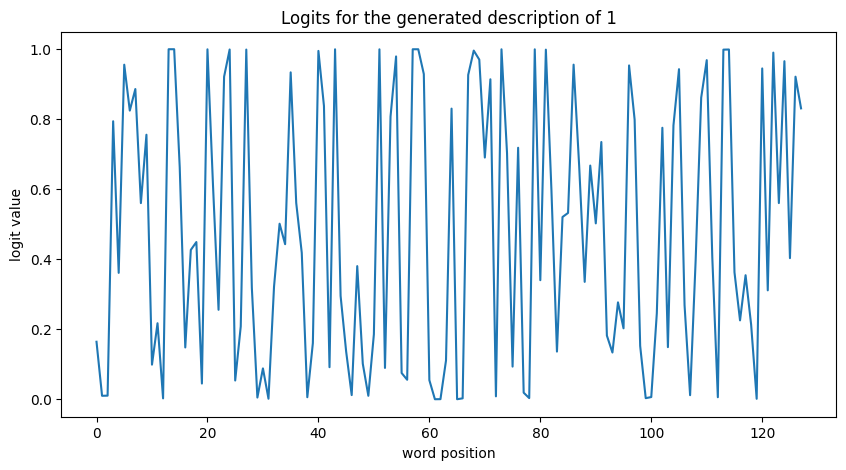

In [44]:
def plot_first_logits_for_sentence(united_divided_df, sentence_index):
    first_logits = [dic[word.strip()] for word, dic in united_divided_df['logits'][sentence_index]]
    #hallucinations = 

    plt.figure(figsize=(10, 5))
    plt.plot(first_logits)
    plt.xlabel('word position')
    plt.ylabel('logit value')
    plt.title(f'Logits for the generated description of {sentence_index}')
    plt.show()

print(united_divided_df['description'][1])
plot_first_logits_for_sentence(united_divided_df, 1)